In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


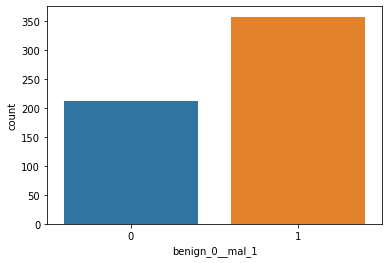

In [5]:
sns.countplot(x = 'benign_0__mal_1', data = df)

In [6]:
#they are almost balanced

In [7]:
#checking the correlation b/w the features

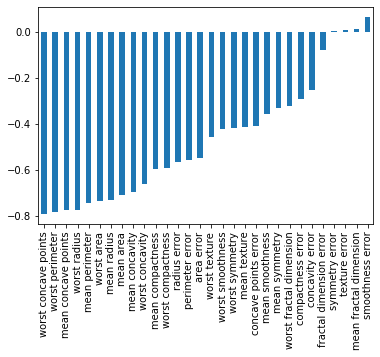

In [8]:
df.corr()['benign_0__mal_1'].iloc[:-1].sort_values().plot(kind = 'bar')

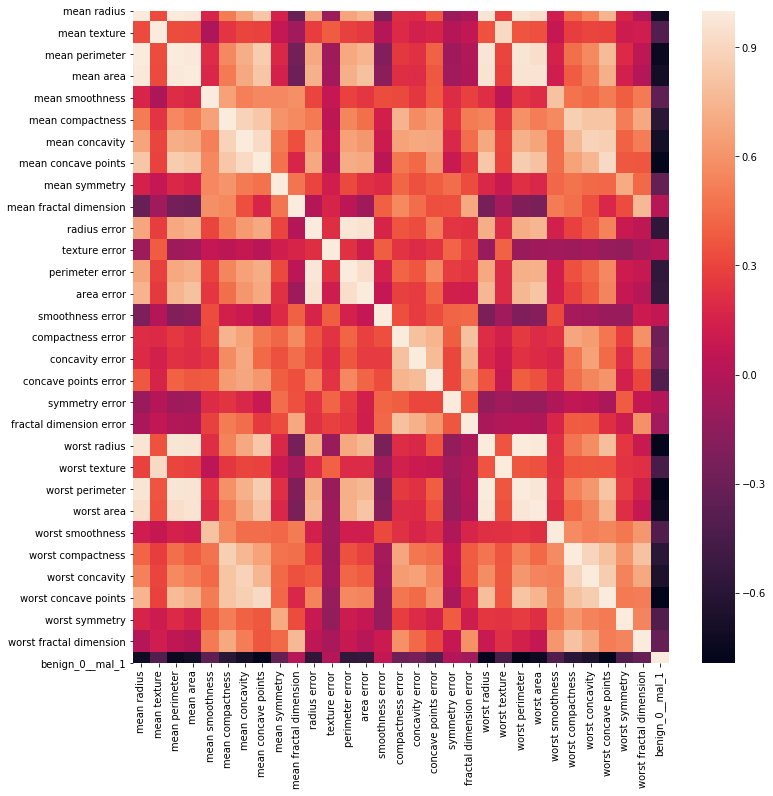

In [9]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [10]:
X = df.drop('benign_0__mal_1', axis = 1).values
y = df['benign_0__mal_1'].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
X_train = scaler.fit_transform(X_train)

In [16]:
X_test = scaler.transform(X_test)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [18]:
X_train.shape

(426, 30)

In [19]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))
#Binary classification, hence, sigmoid function
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [20]:
model.fit(x = X_train, y= y_train, epochs = 600, validation_data = (X_test, y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 2s 4ms/sample - loss: 0.6943 - val_loss: 0.6717
Epoch 2/600
426/426 [==============================] - 0s 187us/sample - loss: 0.6496 - val_loss: 0.6368
Epoch 3/600
426/426 [==============================] - 0s 191us/sample - loss: 0.6117 - val_loss: 0.6006
Epoch 4/600
426/426 [==============================] - 0s 187us/sample - loss: 0.5749 - val_loss: 0.5587
Epoch 5/600
426/426 [==============================] - 0s 227us/sample - loss: 0.5310 - val_loss: 0.5090
Epoch 6/600
426/426 [==============================] - 0s 151us/sample - loss: 0.4832 - val_loss: 0.4562
Epoch 7/600
426/426 [==============================] - 0s 154us/sample - loss: 0.4336 - val_loss: 0.4068
Epoch 8/600
426/426 [==============================] - 0s 151us/sample - loss: 0.3884 - val_loss: 0.3618
Epoch 9/600
426/426 [==============================] - 0s 157us/sample - loss: 0.3473 - val_loss: 0.3199
Epoch 10/60

Epoch 154/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0451 - val_loss: 0.1243
Epoch 155/600
426/426 [==============================] - 0s 136us/sample - loss: 0.0420 - val_loss: 0.1332
Epoch 156/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0421 - val_loss: 0.1305
Epoch 157/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0422 - val_loss: 0.1315
Epoch 158/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0411 - val_loss: 0.1290
Epoch 159/600
426/426 [==============================] - 0s 182us/sample - loss: 0.0438 - val_loss: 0.1338
Epoch 160/600
426/426 [==============================] - 0s 180us/sample - loss: 0.0440 - val_loss: 0.1356
Epoch 161/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0429 - val_loss: 0.1316
Epoch 162/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0444 - val_loss: 0.1248
Epoch 163/600
426/426 [==============

426/426 [==============================] - 0s 239us/sample - loss: 0.0283 - val_loss: 0.1453
Epoch 307/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0285 - val_loss: 0.1640
Epoch 308/600
426/426 [==============================] - 0s 172us/sample - loss: 0.0274 - val_loss: 0.1503
Epoch 309/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0274 - val_loss: 0.1649
Epoch 310/600
426/426 [==============================] - 0s 178us/sample - loss: 0.0278 - val_loss: 0.1556
Epoch 311/600
426/426 [==============================] - 0s 176us/sample - loss: 0.0264 - val_loss: 0.1663
Epoch 312/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0267 - val_loss: 0.1584
Epoch 313/600
426/426 [==============================] - 0s 164us/sample - loss: 0.0275 - val_loss: 0.1566
Epoch 314/600
426/426 [==============================] - 0s 273us/sample - loss: 0.0262 - val_loss: 0.1640
Epoch 315/600
426/426 [============================

426/426 [==============================] - 0s 176us/sample - loss: 0.0192 - val_loss: 0.1936
Epoch 459/600
426/426 [==============================] - 0s 167us/sample - loss: 0.0222 - val_loss: 0.2338
Epoch 460/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0209 - val_loss: 0.1985
Epoch 461/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0163 - val_loss: 0.2174
Epoch 462/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0203 - val_loss: 0.2013
Epoch 463/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0178 - val_loss: 0.2004
Epoch 464/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0165 - val_loss: 0.2131
Epoch 465/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0205 - val_loss: 0.2203
Epoch 466/600
426/426 [==============================] - 0s 165us/sample - loss: 0.0176 - val_loss: 0.1930
Epoch 467/600
426/426 [============================

In [21]:
losses = pd.DataFrame(model.history.history)

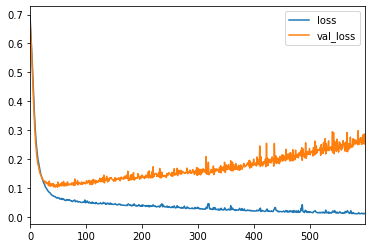

In [22]:
losses.plot()

In [24]:
#As we can clearly see that the training and validation loss were initially decreasing simultaneously, but after a while,
#the validation loss begins increasing. This is a clear example of our model has overfitted.
#which means, we are training for too many epochs

In [25]:
#Now we're gonna use callback to call Early stopping

In [26]:
model = Sequential()

model.add(Dense(30, activation='relu'))

model.add(Dense(15, activation='relu'))
#Binary classification, hence, sigmoid function
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [30]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience=25)

In [29]:
#monitor - Quantity to be monitored
#mode  = 'min' - In this mode, training will stop when the quantity monitored has stopped decreasing
#verbose = 1
#patience = 25 - No. of epochs with no improvement after the training has stopped.Generally to remove the noise

In [31]:
model.fit(x = X_train, y= y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6996 - val_loss: 0.6780
Epoch 2/600
426/426 [==============================] - 0s 180us/sample - loss: 0.6605 - val_loss: 0.6423
Epoch 3/600
426/426 [==============================] - 0s 184us/sample - loss: 0.6218 - val_loss: 0.5975
Epoch 4/600
426/426 [==============================] - 0s 188us/sample - loss: 0.5754 - val_loss: 0.5458
Epoch 5/600
426/426 [==============================] - 0s 170us/sample - loss: 0.5247 - val_loss: 0.4910
Epoch 6/600
426/426 [==============================] - 0s 153us/sample - loss: 0.4681 - val_loss: 0.4320
Epoch 7/600
426/426 [==============================] - 0s 163us/sample - loss: 0.4156 - val_loss: 0.3803
Epoch 8/600
426/426 [==============================] - 0s 171us/sample - loss: 0.3682 - val_loss: 0.3370
Epoch 9/600
426/426 [==============================] - 0s 186us/sample - loss: 0.3296 - val_loss: 0.2976
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0548 - val_loss: 0.1174
Epoch 79/600
426/426 [==============================] - 0s 150us/sample - loss: 0.0550 - val_loss: 0.1133
Epoch 80/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0594 - val_loss: 0.1237
Epoch 81/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0552 - val_loss: 0.1107
Epoch 82/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0531 - val_loss: 0.1196
Epoch 83/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0579 - val_loss: 0.1113
Epoch 84/600
426/426 [==============================] - 0s 139us/sample - loss: 0.0538 - val_loss: 0.1174
Epoch 85/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0531 - val_loss: 0.1152
Epoch 86/600
426/426 [==============================] - 0s 154us/sample - loss: 0.0536 - val_loss: 0.1196
Epoch 87/600
426/426 [========================

In [32]:
model_loss = pd.DataFrame(model.history.history)

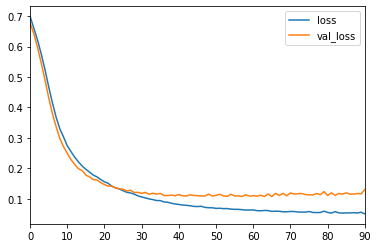

In [33]:
model_loss.plot()

In [34]:
#As we can see here that the validation loss has begin to flatten out, which is a good indication

In [35]:
#Another method of preventing overfitting, is adding dropout layers, these layers will turn off no. of neurons randomly

In [37]:
from tensorflow.keras.layers import Dropout

In [38]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))
#Binary classification, hence, sigmoid function
model.add(Dense(1, activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [39]:
#rate in Dropout - probability that we're going to turn off the actual neurons in each batch(1 epoch of training)

In [40]:
model.fit(x = X_train, y= y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6984 - val_loss: 0.6822
Epoch 2/600
426/426 [==============================] - 0s 170us/sample - loss: 0.6867 - val_loss: 0.6725
Epoch 3/600
426/426 [==============================] - 0s 173us/sample - loss: 0.6765 - val_loss: 0.6637
Epoch 4/600
426/426 [==============================] - 0s 168us/sample - loss: 0.6675 - val_loss: 0.6576
Epoch 5/600
426/426 [==============================] - 0s 192us/sample - loss: 0.6580 - val_loss: 0.6489
Epoch 6/600
426/426 [==============================] - 0s 174us/sample - loss: 0.6488 - val_loss: 0.6373
Epoch 7/600
426/426 [==============================] - 0s 157us/sample - loss: 0.6381 - val_loss: 0.6230
Epoch 8/600
426/426 [==============================] - 0s 172us/sample - loss: 0.6168 - val_loss: 0.5949
Epoch 9/600
426/426 [==============================] - 0s 169us/sample - loss: 0.6035 - val_loss: 0.5649
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 184us/sample - loss: 0.1385 - val_loss: 0.0917
Epoch 79/600
426/426 [==============================] - 0s 164us/sample - loss: 0.1067 - val_loss: 0.0946
Epoch 80/600
426/426 [==============================] - 0s 184us/sample - loss: 0.1240 - val_loss: 0.0881
Epoch 81/600
426/426 [==============================] - 0s 189us/sample - loss: 0.1068 - val_loss: 0.0920
Epoch 82/600
426/426 [==============================] - 0s 190us/sample - loss: 0.1113 - val_loss: 0.0939
Epoch 83/600
426/426 [==============================] - 0s 197us/sample - loss: 0.1123 - val_loss: 0.0909
Epoch 84/600
426/426 [==============================] - 0s 165us/sample - loss: 0.1132 - val_loss: 0.0890
Epoch 85/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0991 - val_loss: 0.0897
Epoch 86/600
426/426 [==============================] - 0s 148us/sample - loss: 0.1258 - val_loss: 0.0872
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0800 - val_loss: 0.0989
Epoch 00155: early stopping


In [41]:
model_loss = pd.DataFrame(model.history.history)

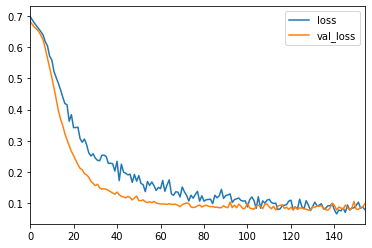

In [42]:
model_loss.plot()

In [43]:
#this is a fantastic behaviour, both training and validation loss, are quickly going down and are flattening out at the 
#same rate

In [44]:
#Evaluate our model

In [45]:
predictions = model.predict_classes(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
#classification report true value(y_test) vs our predictions

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.99      0.97      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



In [ ]:
#accuracy here is a good matric because we had balanced classes, melignant and benign cases were almost balanced

In [48]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 3 85]]


In [ ]:
#This tells us that our model misclassified only one point in our test set